In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Đường dẫn file
file_path = 'Data/kiemtra.txt'




In [68]:
df = pd.read_csv(file_path, header=None)
pd.set_option('display.width', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False) 
# Gán nhãn cột
df.columns = [
    'Loadcell1', 'Loadcell2', 'Loadcell3', 'Loadcell4', 
    'FSR1', 'FSR2', 'FSR3', 'FSR4', 'FSR5', 'FSR6', 'FSR7', 'FSR8', 'FSR9', 'FSR10'
]
print("Dữ liệu gốc:")
print(f"Số dòng ban đầu: {len(df)}")
print(df.head())
fsr_columns = ['FSR1', 'FSR2', 'FSR3', 'FSR4', 'FSR5', 'FSR6', 'FSR7', 'FSR8', 'FSR9', 'FSR10']
all_fsr_zero = (df[fsr_columns] == 0).all(axis=1)
# Tìm chỉ số đầu tiên từ đầu mà có ít nhất 1 FSR khác 0
start_idx = 0
for i in range(len(df)):
    if not all_fsr_zero.iloc[i]:  # Nếu không phải tất cả FSR đều = 0
        start_idx = i
        break
# Tìm chỉ số cuối cùng từ cuối mà có ít nhất 1 FSR khác 0  
end_idx = len(df) - 1
for i in range(len(df) - 1, -1, -1):
    if not all_fsr_zero.iloc[i]:  # Nếu không phải tất cả FSR đều = 0
        end_idx = i
        break
if start_idx <= end_idx:
    # Cắt từ dòng đầu tiên có FSR khác 0 đến dòng cuối cùng có FSR khác 0
    # Giữ nguyên tất cả dữ liệu ở giữa (kể cả dòng có tất cả FSR = 0)
    df_trimmed = df.iloc[start_idx:end_idx+1].copy()
    print(f"\nĐã cắt bỏ {start_idx} dòng ở đầu và {len(df) - end_idx - 1} dòng ở cuối")
    print(f"Số dòng sau khi cắt: {len(df_trimmed)}")
    # Reset index để dễ dàng làm việc sau này
    df_trimmed.reset_index(drop=True, inplace=True)
    print("\nDữ liệu sau khi cắt:")
    print(df_trimmed.head())
else:
    print("Không có dữ liệu hợp lệ (tất cả các dòng đều có FSR = 0)")
    df_trimmed = pd.DataFrame()  # DataFrame rỗng

Dữ liệu gốc:
Số dòng ban đầu: 119
   Loadcell1  Loadcell2  Loadcell3  Loadcell4  FSR1  FSR2  FSR3  FSR4  FSR5  FSR6  FSR7  FSR8  FSR9  FSR10
0       4.70       4.97       9.86       8.26   0.0   0.0  0.02  0.13  0.05  0.01  0.01   0.0   0.0    0.0
1       4.54       4.82      10.12       8.39   0.0   0.0  0.03  0.13  0.05  0.01  0.01   0.0   0.0    0.0
2       4.49       4.82      10.13       8.38   0.0   0.0  0.03  0.14  0.05  0.01  0.01   0.0   0.0    0.0
3       4.76       5.10       9.66       8.07   0.0   0.0  0.03  0.14  0.05  0.01  0.01   0.0   0.0    0.0
4       4.91       5.17       9.73       8.08   0.0   0.0  0.02  0.13  0.05  0.01  0.01   0.0   0.0    0.0

Đã cắt bỏ 0 dòng ở đầu và 7 dòng ở cuối
Số dòng sau khi cắt: 112

Dữ liệu sau khi cắt:
   Loadcell1  Loadcell2  Loadcell3  Loadcell4  FSR1  FSR2  FSR3  FSR4  FSR5  FSR6  FSR7  FSR8  FSR9  FSR10
0       4.70       4.97       9.86       8.26   0.0   0.0  0.02  0.13  0.05  0.01  0.01   0.0   0.0    0.0
1       4.54       4.8

In [69]:
print(df_trimmed.describe())

        Loadcell1   Loadcell2   Loadcell3   Loadcell4   FSR1   FSR2        FSR3        FSR4        FSR5        FSR6        FSR7   FSR8   FSR9  FSR10
count  112.000000  112.000000  112.000000  112.000000  112.0  112.0  112.000000  112.000000  112.000000  112.000000  112.000000  112.0  112.0  112.0
mean     4.414286    4.742589    7.926429    6.370089    0.0    0.0    0.009554    0.152589    0.040714    0.010982    0.012946    0.0    0.0    0.0
std      2.078479    1.961563    3.743552    3.482221    0.0    0.0    0.012832    0.112103    0.028019    0.008591    0.011519    0.0    0.0    0.0
min     -0.100000    0.020000    0.020000   -0.130000    0.0    0.0    0.000000    0.000000    0.000000    0.000000    0.000000    0.0    0.0    0.0
25%      3.705000    4.120000    4.510000    2.455000    0.0    0.0    0.000000    0.000000    0.000000    0.000000    0.000000    0.0    0.0    0.0
50%      4.170000    4.695000    9.880000    8.180000    0.0    0.0    0.000000    0.170000    0.050000   

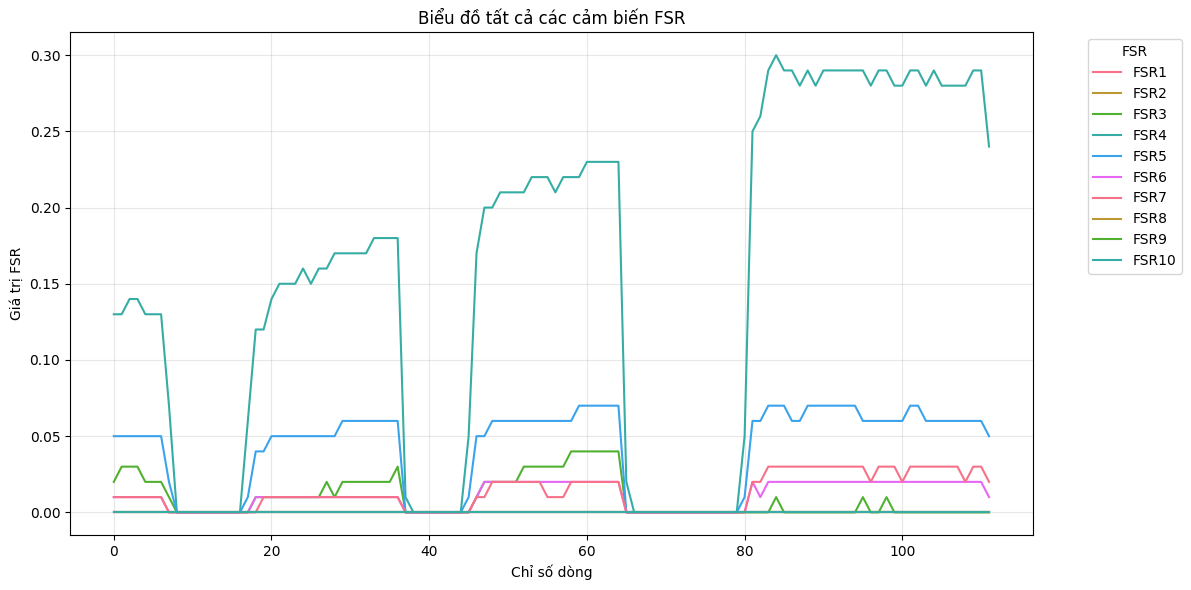

In [70]:
df_trimmed[fsr_columns].plot(
    figsize=(12, 6),
    title='Biểu đồ tất cả các cảm biến FSR'
)
plt.xlabel('Chỉ số dòng')
plt.ylabel('Giá trị FSR')
plt.legend(title='FSR', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

Giá trị lớn nhất: 0.3
Tìm thấy 1 vị trí có giá trị lớn nhất:
  - Dòng 84, cảm biến FSR4


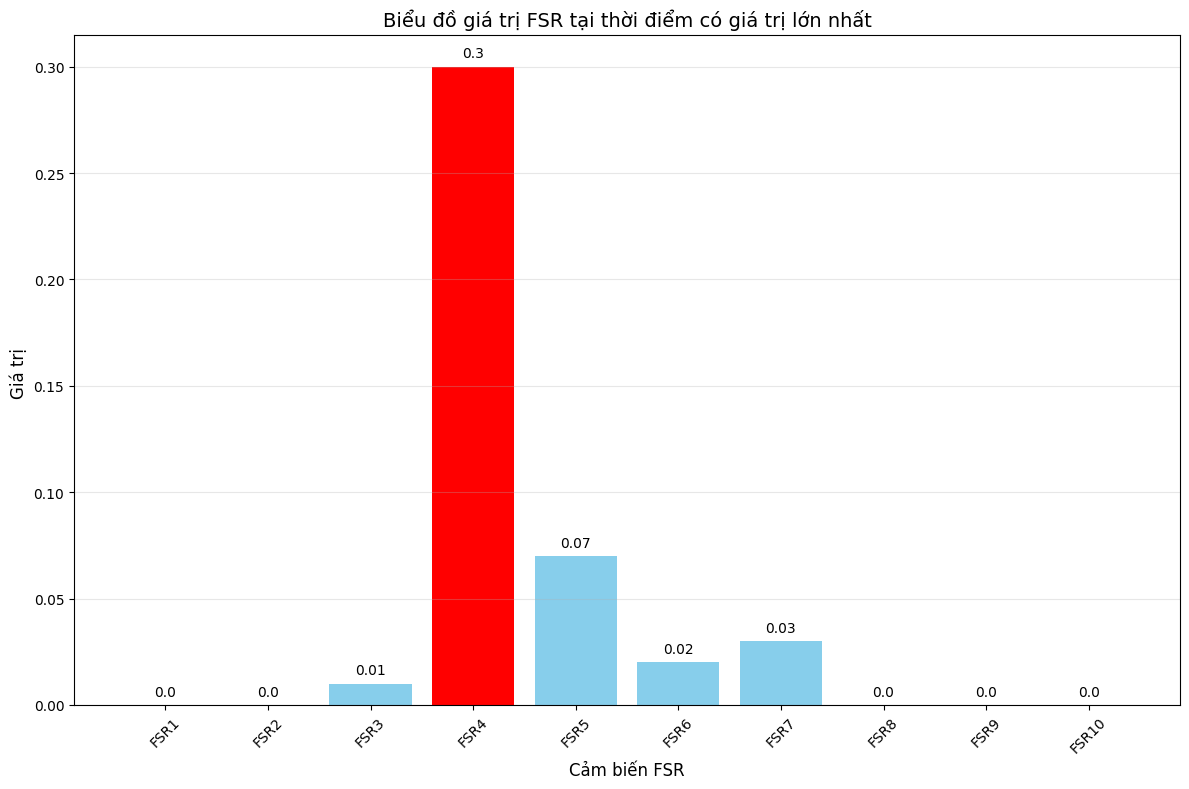

In [71]:
fsr_columns = ['FSR1', 'FSR2', 'FSR3', 'FSR4', 'FSR5', 'FSR6', 'FSR7', 'FSR8', 'FSR9', 'FSR10']

# Tìm giá trị lớn nhất trong tất cả các FSR
max_value = df_trimmed[fsr_columns].max().max()

# Tìm vị trí (dòng và cột) có giá trị lớn nhất
max_positions = []
for col in fsr_columns:
    for idx in df_trimmed.index:
        if df_trimmed.loc[idx, col] == max_value:
            max_positions.append((idx, col))

print(f"Giá trị lớn nhất: {max_value}")
print(f"Tìm thấy {len(max_positions)} vị trí có giá trị lớn nhất:")
for pos in max_positions:
    print(f"  - Dòng {pos[0]}, cảm biến {pos[1]}")

# Lấy dòng đầu tiên có giá trị lớn nhất để vẽ biểu đồ
max_row_idx = max_positions[0][0]
max_sensor = max_positions[0][1]

# Lấy giá trị của tất cả FSR tại thời điểm đó
fsr_values = df_trimmed.loc[max_row_idx, fsr_columns].values

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(fsr_columns)), fsr_values, 
               color=['red' if fsr_columns[i] == max_sensor else 'skyblue' 
                      for i in range(len(fsr_columns))])

# Tùy chỉnh biểu đồ
plt.xlabel('Cảm biến FSR', fontsize=12)
plt.ylabel('Giá trị ', fontsize=12)
plt.title('Biểu đồ giá trị FSR tại thời điểm có giá trị lớn nhất', fontsize=14)
plt.xticks(range(len(fsr_columns)), fsr_columns, rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Thêm giá trị lên đầu mỗi cột
for i, (bar, value) in enumerate(zip(bars, fsr_values)):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max_value*0.01, 
            f'{value}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


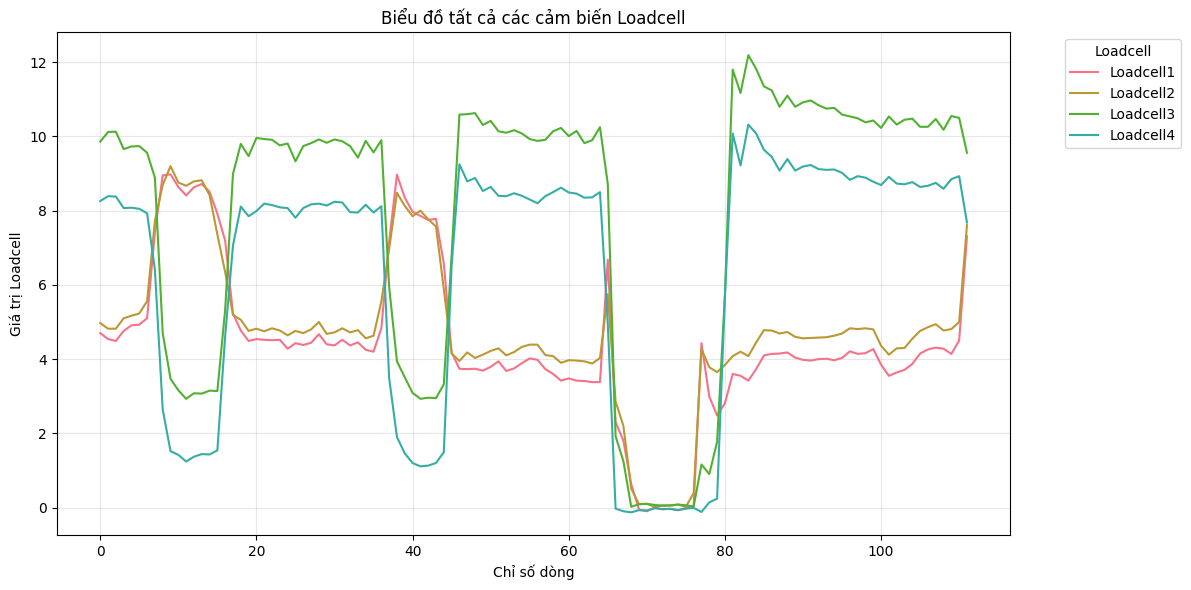

In [72]:
Loadcell_columns = ['Loadcell1', 'Loadcell2', 'Loadcell3', 'Loadcell4']
df_trimmed[Loadcell_columns].plot(
    figsize=(12, 6),
    title='Biểu đồ tất cả các cảm biến Loadcell'
)
plt.xlabel('Chỉ số dòng')
plt.ylabel('Giá trị Loadcell')
plt.legend(title='Loadcell', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()